In [42]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (8,6)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [43]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

Rsun= 6.9598e10
secyer=3600*24*365

In [44]:
#planets plotted
K2137b=0.00482
Trappist1b=0.01151
HATS67b=0.03
K239b=0.057

def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

def ConstRadius():
    # Add Constant radius lines:
    teff=np.arange(1000,30000,1)
    y1= np.log10(const_radius_on_hrd(teff,0.1*c.au)/c.lsun)
    y2= np.log10(const_radius_on_hrd(teff,0.01*c.au)/c.lsun)
    plt.plot(np.log10(teff),y1,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.plot(np.log10(teff),y2,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.fill_between(np.log10(teff), y1 , y2 ,facecolor='grey', alpha=0.05)
    #plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K2137b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.3,\
    #         label= ' K2137 b, 0.004 AU')
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,Trappist1b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.5,\
             label= ' Trappist-1 b, 0.01 AU')
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,HATS67b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.5,\
             label= ' HATS-67 b, 0.03 AU')
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K239b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.5,\
             label= ' K239 b, 0.06 AU')
    legend = plt.legend(loc='lower left', markerscale=15., fancybox=True) #borderpad=0.2
    #change x in 0.01 increments
    #change y in 0.02 increments
    

In [45]:
DATA='./ms1/' 
DATA2='./ms1_mp0.001_rp0.1_rs2_a2.2_tides/' 
DATA4='./ms1_mp0.001_rp0.1_rs4_a4.5_tides/' 
DATA10='./ms1_mp0.001_rp0.1_rs10_a10.5_tides/' 
DATA20='./ms1_mp0.001_rp0.1_rs20_a21_tides/' 
DATA100='./ms1_mp0.001_rp0.1_rs100_a102_tides/' 


DATAS = [DATA2,DATA4,DATA10,DATA20,DATA100]

In [46]:
h = mr.MesaData(DATA+'LOGS/'+'history.data')

From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220222', 50.0, 1000.0]


## HRD Diagram Plot

From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220222', 50.0, 1000.0]
From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220208', 50.0, 1000.0]
From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220209', 50.0, 1000.0]
From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220222', 50.0, 1000.0]
From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220222', 50.0, 1000.0]


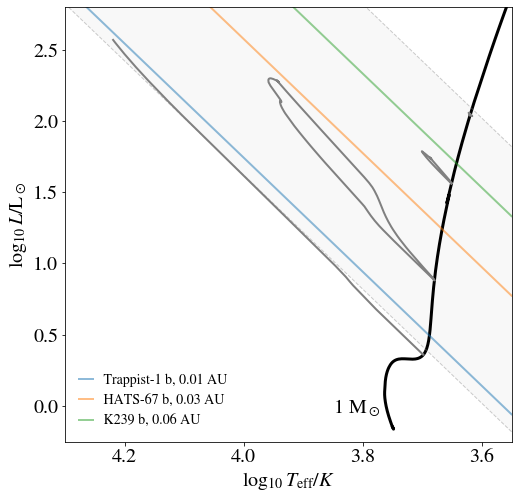

In [47]:
plt.figure(figsize=(8,8))
logle=h.log_L
logte=h.log_Teff
plt.plot(logte,logle,linewidth=3,c='black')

for DAT in DATAS:
    hh=mr.MesaData(DAT+'/LOGS/history.data')
    logl=hh.log_L
    logt=hh.log_Teff
    
    plt.plot(logt,logl,linewidth=2,c='gray')


#plt.axis([3.87,3.65, 1, 2.1])
plt.xlabel(r'$\log_{10} \, T_{\rm eff} / K $')
plt.ylabel(r'$\log_{10}\, L / {\rm L}_\odot $')
plt.gca().invert_xaxis()
plt.annotate(r'1 M$_\odot$',(3.85, -0.05),fontsize=20)

plt.axis([4.3, 3.55, -0.25, 2.8])

    
ConstRadius()

## Orbital Evolution Plot

From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220208', 50.0, 1000.0]


Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

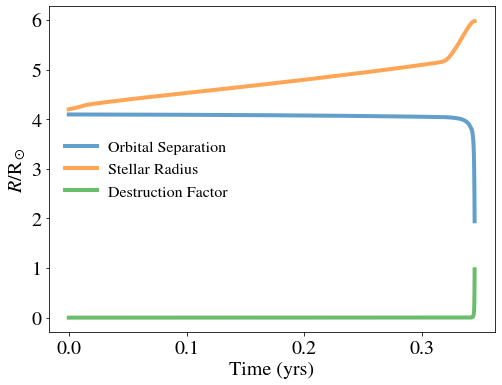

In [48]:
DATA4='./ms1_mp0.001_rp0.1_rs4_a4.5_tides/' 
h=mr.MesaData(DATA4+'/LOGS/history.data')

# Find where engulfment occurs


injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity

eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
star_radius=10**h.log_R
model= h.model_number

tidal = np.where(eng_f == 0)
grazing = np.where((0 < eng_f) & (eng_f < 0.999))
plungein= np.where((eng_f == 1) & (dest_f < 1))
relaxation = np.where((eng_f == 1) & (dest_f > 1))


    
#eng=np.where(eng_f>0.999)
#dest = np.where(dest_f<1)

star_radius=10**h.log_R
age=h.star_age
logdt=h.log_dt
logl=h.log_L
logt=h.log_Teff

#sel = np.where(np.in1d(dest,eng))

age = age-age[plungein][0]



t0=0
plt.plot(age[plungein],planet_location[plungein],linewidth=4,alpha=0.7,label=' Orbital Separation')
plt.plot(age[plungein],star_radius[plungein],linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age[plungein],dest_f[plungein],linewidth=4,alpha=0.7,label=' Destruction Factor')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([3,6, -1 , 5.9])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

7.937345009818254e-07


Text(0.5, 0, 'Time (yr)')

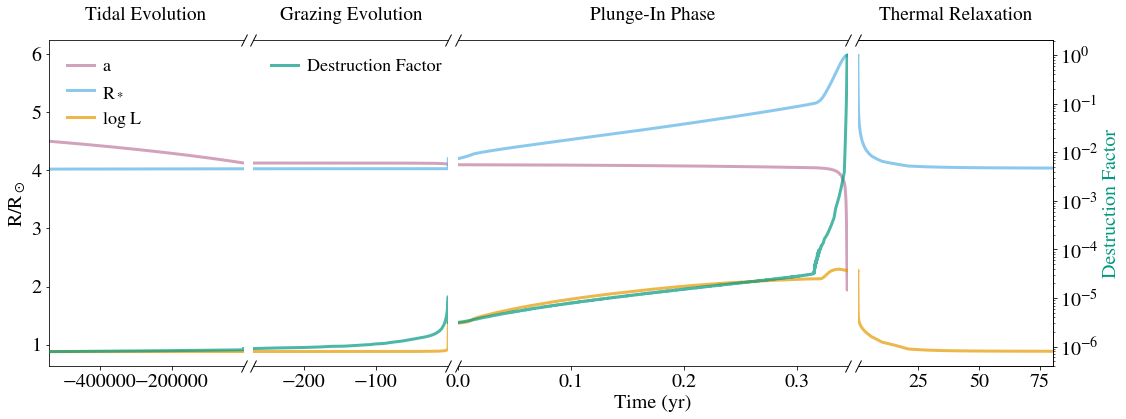

In [49]:
import matplotlib.pyplot as plt
import numpy as np

dest=10**h.Log_Destruction_factor
print(dest[tidal][0])
# use width_ratios to define the width of each subplot
# depending on the range we want to plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, facecolor='w',
                                  gridspec_kw={'width_ratios': (1, 1, 2, 1)},figsize=(18,6))
plt.subplots_adjust(wspace=0.04, hspace=0)

ax1.plot(age,planet_location,linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax2.plot(age,planet_location,linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax3.plot(age,planet_location,linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
#ax4.plot(age,planet_location,linewidth=2,alpha=0.7,label=' Orbital Separation',c='black')

ax1.plot(age,star_radius,linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax2.plot(age,star_radius,linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax3.plot(age,star_radius,linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax4.plot(age,star_radius,linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)

ax1.plot(age,logl,linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax2.plot(age,logl,linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax3.plot(age,logl,linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax4.plot(age,logl,linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)

ax1.set_xlim(age[tidal][0],age[tidal][-1])  # x-axis range limited to 0 - 100 
ax2.set_xlim(age[grazing][0], age[grazing][-1])  # x-axis range limited to 250 - 300
ax3.set_xlim(age[plungein][0], age[plungein][-1]+0.001)  # x-axis range limited to 400 - 500
ax4.set_xlim(age[relaxation][0]+0.001, age[relaxation][0]+80)  # x-axis range limited to 400 - 500

#ax1.set_xscale('log')
#ax4.set_xscale('log')

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Move right hand axes ticks to right hand side
ax4.yaxis.tick_right()

# Turn off ticks on middle axes; so we don't affect the other
# axes ticks, let's just set the length to 0 here
ax2.tick_params(axis='y', length=0)
ax3.tick_params(axis='y', length=0)
ax4.tick_params(axis='y', length=0)

# Draw the diagonal lines to show broken axes
d = 2.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([1, 1], [0, 1], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)
ax3.plot([1, 1], [0, 1], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 0], [0, 1], transform=ax4.transAxes, **kwargs)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()


ax3b.tick_params(axis='y', length=0)
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])

ax2b.tick_params(axis='y', length=0)
ax3b.tick_params(axis='y', length=0)

ax4b.spines['left'].set_visible(False)

ax1b.axis('off')
ax2b.axis('off')
ax3b.axis('off')

#ax1b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax2b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax3b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
##ax4b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')

#ax4b.set_ylabel(r'v$_{\rm orb}$ (km/s)', color='g')


ax1b.plot(age,dest,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax2b.plot(age,dest,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax3b.plot(age,dest,linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax4b.plot(age,dest,linewidth=3,alpha=0.0,label=r'Destruction Factor',c=BLUE_GREEN)

ax4b.set_ylabel('Destruction Factor', color=BLUE_GREEN)

ax1b.set_yscale('log')
ax2b.set_yscale('log')
ax3b.set_yscale('log')
ax4b.set_yscale('log')

ax1.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax2b.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)


ax1.set_title('Tidal Evolution')
ax2.set_title('Grazing Evolution')
ax3.set_title('Plunge-In Phase')
ax4.set_title('Thermal Relaxation')

ax1.set_ylabel(r'R/${\rm R}_\odot$')
ax3.set_xlabel(r'Time (yr)')

7.937345009818254e-07


Text(0.5, 0, 'Time (yr)')

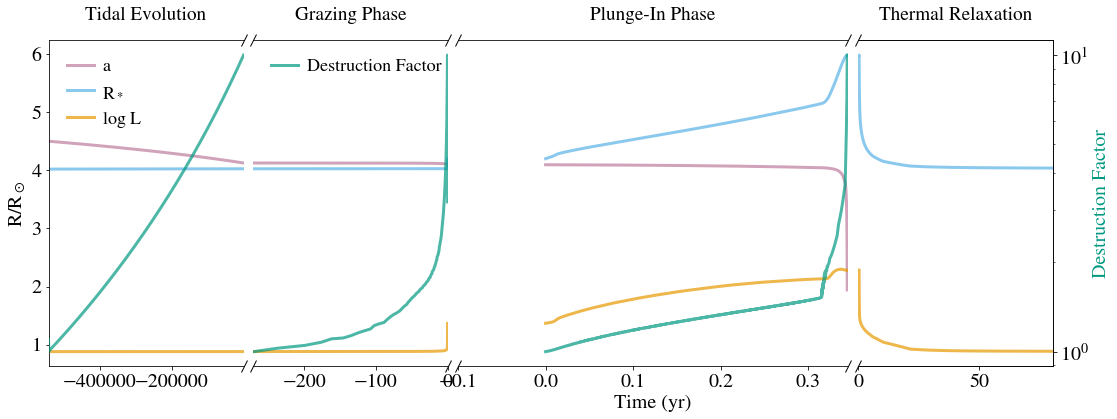

In [50]:
import matplotlib.pyplot as plt
import numpy as np

dest=10**h.Log_Destruction_factor
print(dest[tidal][0])
# use width_ratios to define the width of each subplot
# depending on the range we want to plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, facecolor='w',
                                  gridspec_kw={'width_ratios': (1, 1, 2, 1)},figsize=(18,6))
plt.subplots_adjust(wspace=0.04, hspace=0)

ax1.plot(age[tidal],planet_location[tidal],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax2.plot(age[grazing],planet_location[grazing],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
ax3.plot(age[plungein],planet_location[plungein],linewidth=3,alpha=0.9,label='a',c=RED_PURPLE)
#ax4.plot(age,planet_location,linewidth=2,alpha=0.7,label=' Orbital Separation',c='black')

ax1.plot(age[tidal],star_radius[tidal],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax2.plot(age[grazing],star_radius[grazing],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax3.plot(age[plungein],star_radius[plungein],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)
ax4.plot(age[relaxation],star_radius[relaxation],linewidth=3,alpha=0.7,label=r'R$_*$',c=SKY_BLUE)

ax1.plot(age[tidal],logl[tidal],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax2.plot(age[grazing],logl[grazing],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax3.plot(age[plungein],logl[plungein],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)
ax4.plot(age[relaxation],logl[relaxation],linewidth=3,alpha=0.7,label=r'$\log$ L',c=ORANGE)

# hide the spines between ax and ax3
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# Move right hand axes ticks to right hand side
ax4.yaxis.tick_right()

# Turn off ticks on middle axes; so we don't affect the other
# axes ticks, let's just set the length to 0 here
ax2.tick_params(axis='y', length=0)
ax3.tick_params(axis='y', length=0)
ax4.tick_params(axis='y', length=0)

# Draw the diagonal lines to show broken axes
d = 2.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([1, 1], [0, 1], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 0], [0, 1], transform=ax3.transAxes, **kwargs)
ax3.plot([1, 1], [0, 1], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 0], [0, 1], transform=ax4.transAxes, **kwargs)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()


ax3b.tick_params(axis='y', length=0)
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])

ax2b.tick_params(axis='y', length=0)
ax3b.tick_params(axis='y', length=0)

ax4b.spines['left'].set_visible(False)

ax1b.axis('off')
ax2b.axis('off')
ax3b.axis('off')

#ax1b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax2b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
#ax3b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')
##ax4b.plot(age,v_orb,linewidth=3,alpha=0.7,label=r'v$_{\rm orb}$',c='g')

#ax4b.set_ylabel(r'v$_{\rm orb}$ (km/s)', color='g')


ax1b.plot(age[tidal],dest[tidal],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax2b.plot(age[grazing],dest[grazing],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax3b.plot(age[plungein],dest[plungein],linewidth=3,alpha=0.7,label=r'Destruction Factor',c=BLUE_GREEN)
ax4b.plot(age[relaxation],dest[relaxation],linewidth=3,alpha=0.0,label=r'Destruction Factor',c=BLUE_GREEN)

ax4b.set_ylabel('Destruction Factor', color=BLUE_GREEN)

ax1b.set_yscale('log')
ax2b.set_yscale('log')
ax3b.set_yscale('log')
ax4b.set_yscale('log')

ax1.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)
ax2b.legend(handlelength=1.5,frameon=False,loc="upper left",fontsize=18)

# Axis limits

ax1.set_xlim(age[tidal][0],age[tidal][-1])  # x-axis range limited to 0 - 100 
ax2.set_xlim(age[grazing][0]-1, age[grazing][-1]+1)  # x-axis range limited to 250 - 300
ax3.set_xlim(age[plungein][0]-0.1, age[plungein][-1]+0.001)  # x-axis range limited to 400 - 500
ax4.set_xlim(age[relaxation][0]-0.5, age[relaxation][0]+80)  # x-axis range limited to 400 - 500


ax1.set_title('Tidal Evolution')
ax2.set_title('Grazing Phase')
ax3.set_title('Plunge-In Phase')
ax4.set_title('Thermal Relaxation')

ax1.set_ylabel(r'R/${\rm R}_\odot$')
ax3.set_xlabel(r'Time (yr)')

NameError: name 'sel' is not defined

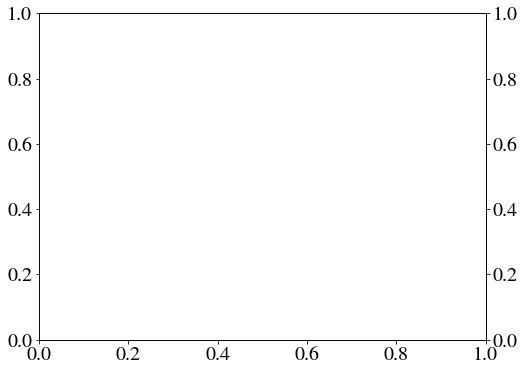

In [51]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity

ax1.plot(age[sel],injected_e[sel],linewidth=2,alpha=0.7,label=' de',c='g')
ax2.plot(age[sel],v_orb[sel],linewidth=2,alpha=0.7,label=' vorb',color='b')
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log$ Injected Energy (erg)')
ax1.set_xlabel(r'Time (yrs)')
ax1.set_ylabel(r'$\log$ Injected Energy (erg)', color='g')
ax2.set_ylabel(r'v$_{\rm orb}$ (km/s)', color='b')

#ax2.ylabel(r'v$_{\rm orb}$ (km/s)')

In [52]:
infall=10**h.Log_Infall_distance/c.rsun
plt.plot(age[sel],np.log10(infall[sel]),linewidth=2,alpha=0.7,label=' dr')

#plt.plot(age[sel],v_orb[sel],linewidth=2,alpha=0.7,label=' Orbital Velocity')

plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log \, $dr / ${\rm R}_\odot$')

NameError: name 'sel' is not defined

NameError: name 'sel' is not defined

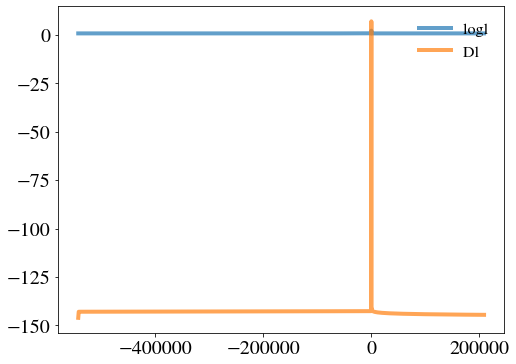

In [53]:
dl = 10**injected_e/((10**logdt)*secyer)

plt.plot(age,logl,linewidth=4,alpha=0.7,label=' logl')
plt.plot(age,np.log10(dl/c.lsun),linewidth=4,alpha=0.7,label=' Dl')
plt.legend(handlelength=2,frameon=False,loc="upper right",fontsize=16)
plt.axis([age[sel][-1]-1,age[sel][-1], 0,7])


plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')

print(sum(10**injected_e))

In [54]:
## Orbital Evolution Plots (in polar coordinates)

In [55]:
mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R

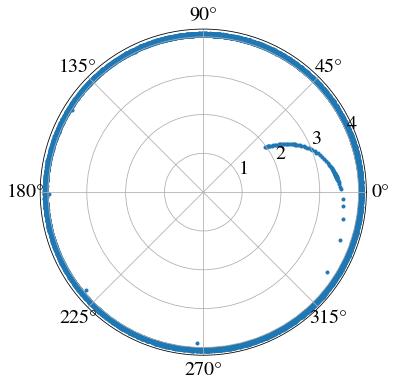

In [56]:
# Number of orbits per timesep 

age=(h.star_age)#*365.0
r=h.Orbital_separation*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Identify plunge-in phase 

i=0
while (f[i] <= 0.0) and (i < len(f)-1):
    i=i+1
# Beginning of plunge-in phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)) and (i < len(f)-1):
    j=j+1
    
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1) and (r[i] > min(r)):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
ax.scatter(alpha[j:i] , r[j:i]/c.rsun,marker=".")

ax.set_rscale('linear')

### Interpolate to increase resolution in early phases

[Text(0.0, 0, ''),
 Text(0.7853981633974483, 0, ''),
 Text(1.5707963267948966, 0, ''),
 Text(2.356194490192345, 0, ''),
 Text(3.141592653589793, 0, ''),
 Text(3.9269908169872414, 0, ''),
 Text(4.71238898038469, 0, ''),
 Text(5.497787143782138, 0, '')]

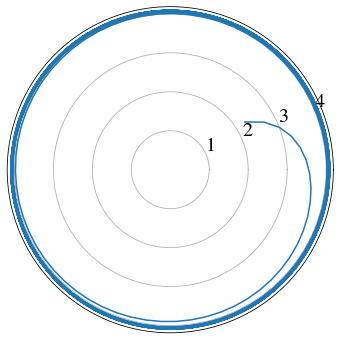

In [57]:
from scipy.interpolate import interp1d

# Arrays for interpolation
x = alpha[j:i]
y = r[j:i]/c.rsun

# Cubic interpolation

f2 = interp1d(x , y, kind='cubic')

# Create new xgrid 
res = 0.1 # interpolation resolution   
xnew = np.arange(min(alpha[j:i]),max(alpha[j:i]),res)

# Create Polar Coordinate Plot  (Note that we have selected only data from plunge-in phase)

ax = plt.subplot(111, projection='polar')
ax.plot(xnew, f2(xnew), '-')
ax.xaxis.grid(False)
ax.set_xticklabels([])
#ax.set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])

From read_log_data  5
From read_log_data header: [1, 3832, 1.0, 0.02, 100000.0, 100000.0, 5619.3160270819535, 0.7087164004592718, 0.8882239674708178, -1.7796634714418411, 0.6994984620705872, 7.506811624173089e-05, 0.2803505251138902, 0.0029911972545917914, 0.001541997429485749, 0.009380503761717148, 0.0020850244238743067, 1.0, 0.0, 0.6999009927797594, 7.088221424987167e-05, 0.28001921110337225, 0.003393397887494298, 0.0010727448603300382, 0.009380524901655921, 0.0020850244238750154, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999179158, 0.8880545755209438, 0.9999999998559489, 0.8879606999938033, 8378.008335473125, 37409847.47154607, 14110016352.831215, 0.7083480406543249, 0.7083480406543247, 5.885047922358408e-48, 0.021097302539214803, 50.0, 1000.0, 3155760000000.0, '15140']
R:(3832,)
THETA:(1000,)
RHO:(3832,)
meshgrid radii:(1000, 3832)
mehgrid thetas:(1000, 3832)
mehgrid rhos:(1000, 3832)


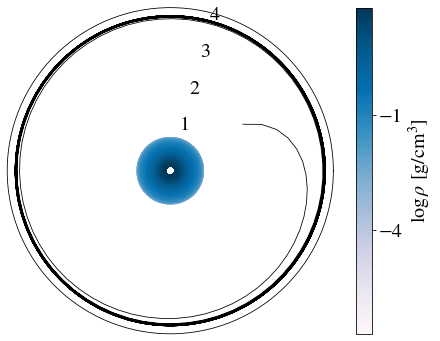

In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = mr.MesaData(DATA+'LOGS/'+'profile1.data')

THETA = np.linspace(0, 360, 1000)
R = 10**p.logR
RHO = p.logRho

radii, thetas = np.meshgrid(R,THETA)
rhos, thetas = np.meshgrid(RHO,THETA)


print("R:{}".format(R.shape))

print("THETA:{}".format(THETA.shape))

print("RHO:{}".format(RHO.shape))

print("meshgrid radii:{}".format(radii.shape))

print("mehgrid thetas:{}".format(thetas.shape))

print("mehgrid rhos:{}".format(rhos.shape))


ax = plt.subplot(111, polar=True)

#ax.plot(thetas, radii, rho, marker='.', ls='none')

#contour_levels = [0.0000000001,0.000000001,0.00000001,0.0000001,
#                  0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0]

#cmap=cm.PuBu_r
#contour_levels = np.arange(5,-5,0.1)
#contour_levels = np.arange(1,0.000001,5,0.1)
#contour_levels = np.arange(0,1.01,0.01)
#contour_levels

contour_levels=np.arange(min(RHO),max(RHO),0.1)
CS = ax.contourf(thetas, radii, rhos,contour_levels,
                 cmap=cm.PuBu)# cm.PuBu
cbar = plt.colorbar(CS,ticks=[-7,-4,-1,2,5])#,ticks=[0,0.25, 0.5, 0.75,1])
cbar.set_label(r"$\log \, \rho$ [g/cm$^3$]")

#cbar.ax.set_yticklabels(['< -1', '0', '> 1']) 

ax.set_xticklabels([])
#ax.set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_rlabel_position(75)
ax.plot(xnew, f2(xnew), '-',c='black',lw=0.8)
#print(rhos)
plt.savefig("./paper/polar_mj_r20_rho.pdf",bbox_inches='tight')

From read_log_data  5
From read_log_data header: [1, 3101, 1.0, 0.02, 40451.13506318735, 40451.13506318735, 4165.765192447315, 109.1988594350996, 20.061926652813177, 18.263933858870704, 0.0, 0.0, 0.9800980801829275, 5.353252813860296e-05, 0.009614722630902529, 0.004071418404893648, 0.002085024423881878, 1.0, 0.0, 0.4869846266177403, 0.0009484359071173449, 0.4921011910998173, 0.0021642021875137047, 0.004243040851292033, 0.007396257083387601, 0.002085024423875374, 0.281558005026501, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999985817167324, 19.976641380580794, 0.9999981272081647, 19.95487749874043, 899323.6486880231, 10749.547118530432, 91576048.06251042, 108.61399775065675, 108.61399775065297, 7.657559322889197e-14, 7.413547507389967, 50.0, 1000.0, 1276540739870.041, '15140']


<ipython-input-59-e178a2fadbe0>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['5', '10', '15', r'20$\,$R$_\odot$'])
<ipython-input-59-e178a2fadbe0>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['5', '10', '15', r'20$\,$R$_\odot$'])


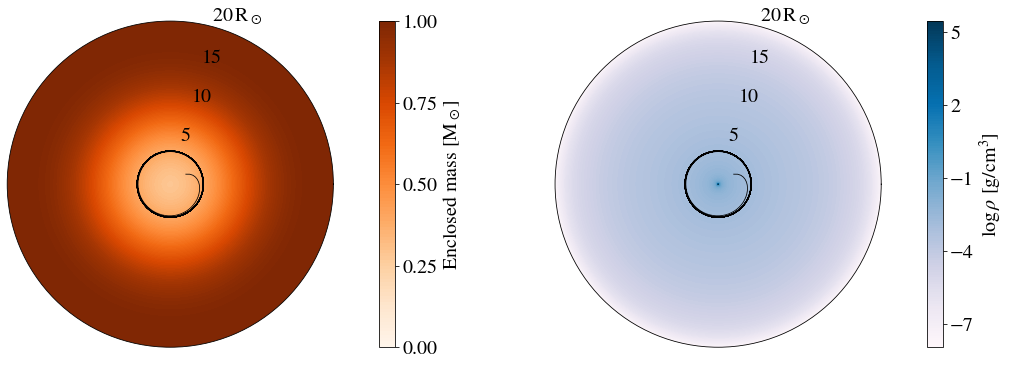

In [59]:
p = mr.MesaData(DATA20+'LOGS/'+'profile1.data')
fig, axs = plt.subplots(1, 2, figsize=(18,6),subplot_kw=dict(projection='polar'))

    
# Plot 1

THETA = np.linspace(0, 360, 1000)
R = p.radius
M = p.mass 
radii, thetas = np.meshgrid(R,THETA)
masses, thetas = np.meshgrid(M,THETA)

contour_levels = np.arange(0,1.01,0.01)
p1 = axs[0].contourf(thetas, radii, masses, contour_levels,cmap=cm.Oranges)
cb = fig.colorbar(p1, ax = axs[0], pad = 0.1,ticks=[0,0.25, 0.5, 0.75,1])
#cbar = plt.colorbar(p1,ticks=[0,0.25, 0.5, 0.75,1])
cb.set_label(r"Enclosed mass [M$_\odot$]")

# Plot 2

RHO = p.logRho
rhos, thetas = np.meshgrid(RHO,THETA)

contour_levels=np.arange(min(RHO),max(RHO),0.1)
p2 = axs[1].contourf(thetas, radii, rhos,contour_levels,cmap=cm.PuBu)
cb2 = fig.colorbar(p2, ax = axs[1], pad = 0.1,ticks=[-7,-4,-1,2,5])
cb2.set_label(r"$\log \, \rho$ [g/cm$^3$]")


axs[0].set_xticklabels([])
axs[0].set_yticklabels(['5', '10', '15', r'20$\,$R$_\odot$'])
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)
axs[0].set_rlabel_position(75)
axs[0].plot(xnew, f2(xnew), '-',c='black',lw=0.8)

axs[1].set_xticklabels([])
axs[1].set_yticklabels(['5', '10', '15', r'20$\,$R$_\odot$'])
axs[1].xaxis.grid(False)
axs[1].yaxis.grid(False)
axs[1].set_rlabel_position(75)
axs[1].plot(xnew, f2(xnew), '-',c='black',lw=0.8)

plt.savefig("./paper/polar_mj_r20.png",bbox_inches='tight')


From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220209', 50.0, 1000.0]


<ipython-input-60-3e0378d7d90a>:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, projection='polar')


[Text(0.0, 0, ''),
 Text(0.7853981633974483, 0, ''),
 Text(1.5707963267948966, 0, ''),
 Text(2.356194490192345, 0, ''),
 Text(3.141592653589793, 0, ''),
 Text(3.9269908169872414, 0, ''),
 Text(4.71238898038469, 0, ''),
 Text(5.497787143782138, 0, '')]

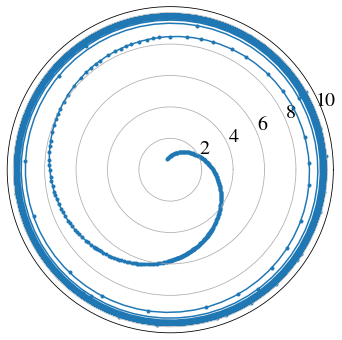

In [60]:
from scipy.interpolate import interp1d
import matplotlib.cm as cm
import matplotlib as mtpl

h=mr.MesaData(DATA10+'/LOGS/history.data')

# Number of orbits per timesep 

age=(h.star_age)#*365.0
r=h.Orbital_separation*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Identify plunge-in phase 

i=0
while (f[i] <= 0.0) and (i < len(f)-1):
    i=i+1
# Beginning of plunge-in phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)) and (i < len(f)-1):
    j=j+1
    
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1) and (r[i] > min(r)):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
ax.scatter(alpha[j:i] , r[j:i]/c.rsun,marker=".")

ax.set_rscale('linear')

# Arrays for interpolation
x = alpha[j:i]
y = r[j:i]/c.rsun

# Cubic interpolation

f2 = interp1d(x , y, kind='cubic')

# Create new xgrid 
res = 0.1 # interpolation resolution   
xnew = np.arange(min(alpha[j:i]),max(alpha[j:i]),res)

# Create Polar Coordinate Plot  (Note that we have selected only data from plunge-in phase)

ax = plt.subplot(111, projection='polar')
ax.plot(xnew, f2(xnew), '-')
ax.xaxis.grid(False)
ax.set_xticklabels([])
#ax.set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])

From read_log_data  5
From read_log_data header: [1, 2944, 1.0, 0.02, 126986.60192293832, 126986.60192293832, 4477.014202113597, 36.30617842218478, 10.015358178172267, 16.488216085029947, 0.0, 0.0, 0.9800980801829425, 5.353252817379811e-05, 0.00961472263090718, 0.00407141840484562, 0.002085024423875294, 1.0, 0.0, 0.5114880650177109, 0.0009944225593646941, 0.467528698645312, 0.0022639187690771715, 0.0038488970116273644, 0.0077137517437770925, 0.0020850244238750566, 0.24522801032158734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999998375103494, 9.993668097762235, 0.9999997764976601, 9.987294692285023, 317217.2418484212, 64764.03295192042, 275435213.35998094, 36.133693838047925, 36.133693838047925, 8.432890603038332e-17, 2.4748012408456033, 50.0, 1000.0, 4007392388843.3184, '15140']


<ipython-input-61-d00726f9d5c7>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])
<ipython-input-61-d00726f9d5c7>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])


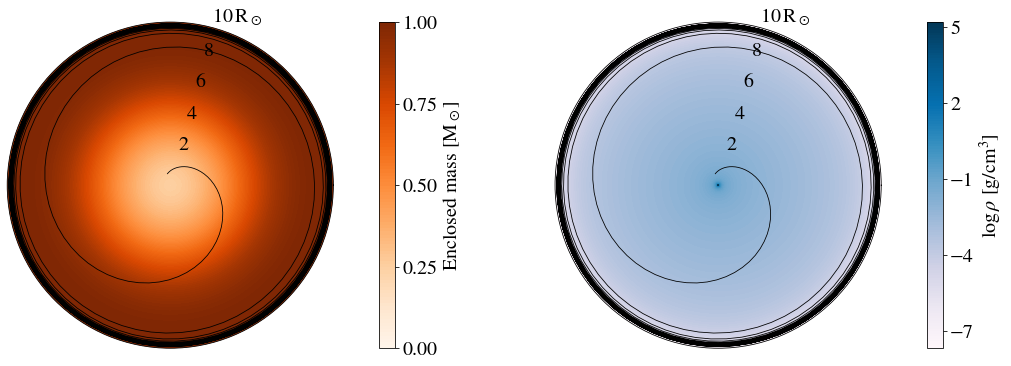

In [61]:
p = mr.MesaData(DATA10+'LOGS/'+'profile1.data')
fig, axs = plt.subplots(1, 2, figsize=(18,6),subplot_kw=dict(projection='polar'))

    
# Plot 1

THETA = np.linspace(0, 360, 1000)
R = 10**p.logR
M = p.mass 
radii, thetas = np.meshgrid(R,THETA)
masses, thetas = np.meshgrid(M,THETA)

contour_levels = np.arange(0,1.01,0.01)
p1 = axs[0].contourf(thetas, radii, masses, contour_levels,cmap=cm.Oranges)
cb = fig.colorbar(p1, ax = axs[0], pad = 0.1,ticks=[0,0.25, 0.5, 0.75,1])
#cbar = plt.colorbar(p1,ticks=[0,0.25, 0.5, 0.75,1])
cb.set_label(r"Enclosed mass [M$_\odot$]")

# Plot 2

RHO = p.logRho
rhos, thetas = np.meshgrid(RHO,THETA)

contour_levels=np.arange(min(RHO),max(RHO),0.1)
p2 = axs[1].contourf(thetas, radii, rhos,contour_levels,cmap=cm.PuBu)
cb2 = fig.colorbar(p2, ax = axs[1], pad = 0.1,ticks=[-7,-4,-1,2,5])
cb2.set_label(r"$\log \, \rho$ [g/cm$^3$]")


axs[0].set_xticklabels([])
axs[0].set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])
axs[0].xaxis.grid(False)
axs[0].yaxis.grid(False)
axs[0].set_rlabel_position(75)
axs[0].plot(xnew, f2(xnew), '-',c='black',lw=0.8)

axs[1].set_xticklabels([])
axs[1].set_yticklabels(['2', '4', '6', '8', r'10$\,$R$_\odot$'])
axs[1].xaxis.grid(False)
axs[1].yaxis.grid(False)
axs[1].set_rlabel_position(75)
axs[1].plot(xnew, f2(xnew), '-',c='black',lw=0.8)

plt.savefig("./paper/polar_mj_r10.png",bbox_inches='tight')
